In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import cv2
from  matplotlib.colors import LinearSegmentedColormap
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, find_peaks
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from scipy.io import savemat
from src.xray import *
from src.tdt_support import *
from src.filters import *
from src.neural_analysis import *
from src.cort_processing import *
from src.wiener_filter import *


In [2]:
from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *

In [2]:
session = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-12')

read from t=0s to t=186.82s
read from t=0s to t=164.93s
read from t=0s to t=222.7s
read from t=0s to t=241.72s


In [7]:
#crop for annie-5-12
crop = [(12,160),(10,155), (9, 210), (12, 230)]

In [ ]:
rate_list, kin_list = session.process(crop, threshold_multiplier=3.0)

In [3]:
bp_list, coords = extract_anipose_3d('/home/diya/Documents/rat-fes/data/rat-annie/5-12/pose-3d/_annie4-220512-152742_200f-11e100g.csv')

In [4]:
for i, thing in enumerate(bp_list):
    print(i, thing)

0 toe
1 MTP
2 ankle
3 knee
4 pelvis bottom
5 hip
6 pelvis top
7 finger
8 knuckle
9 wrist
10 elbow
11 shoulder
12 scapula
13 x1
14 x2
15 y1
16 y2


In [5]:
list_of_joints = [[6, 5, 1], [2, 3, 5]]
angles = get_joint_angles(coords, list_of_joints)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
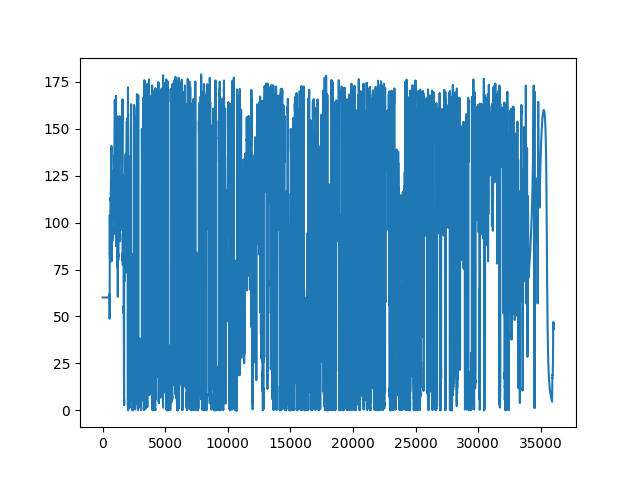

In [6]:
fig0=plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(angles[:,0])

In [4]:
tdt1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-220303-161731'
kin1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
toe1 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15_2022-03-03_200f-11e100g1.csv'
np_ts1 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15_2022-03-03_200f-11e100g1.npy'
crop1 = (5,180)

tdt2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-2-220303-162513'
kin2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
toe2 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-2_2022-03-03_200f-11e100g1.csv'
np_ts2 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-2_2022-03-03_200f-11e100g1.npy'
crop2 = (31,227)

tdt3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-3-220303-163055'
kin3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
toe3 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-3_2022-03-03_200f-11e100g1.csv'
np_ts3 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-3_2022-03-03_200f-11e100g1.npy'
crop3 = (5,200)

tdt4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/tdt/t0-030322-15-4-220303-163556'
kin4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/angles/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
toe4 = '/home/diya/Documents/rat-fes/data/DLC_anipose_models/anipose_t_march/session/pose-3d/_t0-030322-15-4_2022-03-03_200f-11e100g1.csv'
np_ts4 = '/home/diya/Documents/rat-fes/data/rat-t/03-03-22/vids/TIMESTAMPS_cam1_t0-030322-15-4_2022-03-03_200f-11e100g1.npy'
crop4 = (5,150)

In [5]:
nada, full_angles1 = extract_anipose_angles(kin1)
full_angles1 = full_angles1[:, crop1[0]*200:crop1[1]*200]

nada, full_angles2 = extract_anipose_angles(kin2)
full_angles2 = full_angles2[:, crop2[0]*200:crop2[1]*200]

nada, full_angles3 = extract_anipose_angles(kin3)
full_angles3 = full_angles3[:, crop3[0]*200:crop3[1]*200]

nada, full_angles4 = extract_anipose_angles(kin4)
full_angles4 = full_angles4[:, crop4[0]*200:crop4[1]*200]

full_angles_list=[]
full_angles_list.extend((full_angles1, full_angles2, full_angles3, full_angles4))
uncut_kins = np.hstack(full_angles_list)

In [5]:
nada

['ankle', 'knee', 'hip', 'limbfoot', 'elbow', 'shoulder', 'forelimb']

In [6]:
elbow = uncut_kins[-3,:]
shoulder=uncut_kins[-2,:]
forelimb = uncut_kins[-1,:]
limbfoot = uncut_kins[3,:]

elbow_correlate = np.correlate(elbow, limbfoot, mode='full')
shoulder_correlate = np.correlate(shoulder, limbfoot, mode='full')
forelimb_correlate = np.correlate(forelimb, limbfoot, mode='full')



In [7]:
total = forelimb_correlate.shape[0]
x_ = np.arange(total)
x=x_-((total-1)/2)

In [18]:
elbow_max = np.argmax(elbow_correlate) - ((total-1)/2)
shoulder_max = np.argmax(shoulder_correlate) - ((total-1)/2)
forelimb_max = np.argmax(forelimb_correlate) - ((total-1)/2)

print(elbow_max, shoulder_max, forelimb_max)

23.0 -22.0 21.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
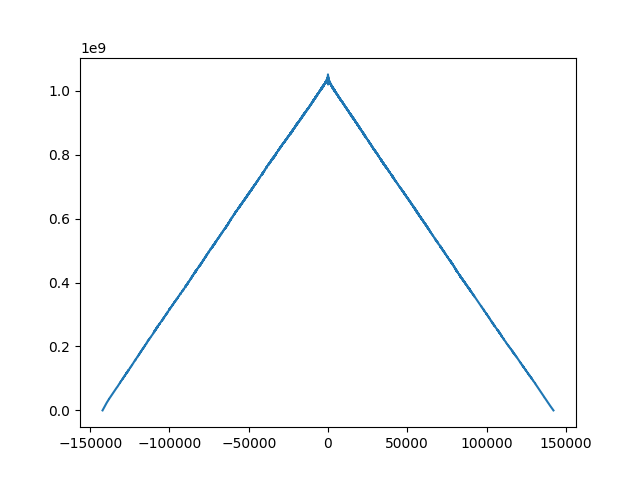

In [9]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
#ax0.plot(forelimb)
#ax0.plot(norm_limbfoot)
ax0.plot(x,shoulder_correlate)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
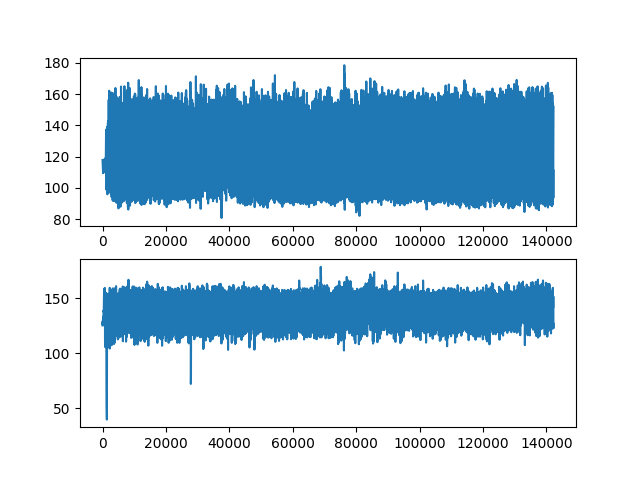

In [31]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(211)
#ax1.plot(limbfoot)
ax1.plot(limbfoot)
ax11=fig1.add_subplot(212, sharex=ax1)
ax11.plot(forelimb)

In [30]:
forelimb_peaks = extract_peaks(forelimb, 140)
print(forelimb_peaks.shape)
limbfoot_peaks = extract_peaks(limbfoot)
print(limbfoot_peaks.shape)

(1563,)
(1360,)


In [6]:
rates1, angles1= process_neural_kinangles(tdt1, kin1, np_ts1, 3.0, crop1, binsize=0.05, toe_height_path = toe1)
rates2, angles2= process_neural_kinangles(tdt2, kin2, np_ts2, 3.0, crop2, binsize=0.05, toe_height_path = toe2)
rates3, angles3= process_neural_kinangles(tdt3, kin3, np_ts3, 3.0, crop3, binsize=0.05, toe_height_path = toe3)
rates4, angles4= process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, crop4, binsize=0.05, toe_height_path = toe4)

#test_rates5, test_angles5 = process_neural_kinangles(tdt4, kin4, np_ts4, 3.0, test_crop, binsize=0.05)

rates_list = []
angles_list = []

rates_list.extend((rates1, rates2, rates3, rates4))
angles_list.extend((angles1, angles2, angles3, angles4))

read from t=0s to t=209.21s
read from t=0s to t=242.15s
read from t=0s to t=206.37s
read from t=0s to t=157.26s


In [5]:
proc_rates_list = []
proc_angles_list = []
for i in range(len(rates_list)):
    proc_rates, proc_angles = remove_bad_gaits(rates_list[i], angles_list[i], 115)
    proc_rates_list.append(proc_rates)
    proc_angles_list.append(proc_angles)

NameError: name 'rates_list' is not defined

In [7]:
proc_rates, proc_kins = stitch_data(proc_rates_list, proc_angles_list)
rates, kins = stitch_data(rates_list, angles_list)

In [6]:
limbfoot = uncut_kins[3,:]

In [7]:
limbfoot_phase, start, end, peaks  = convert_to_phase(limbfoot)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
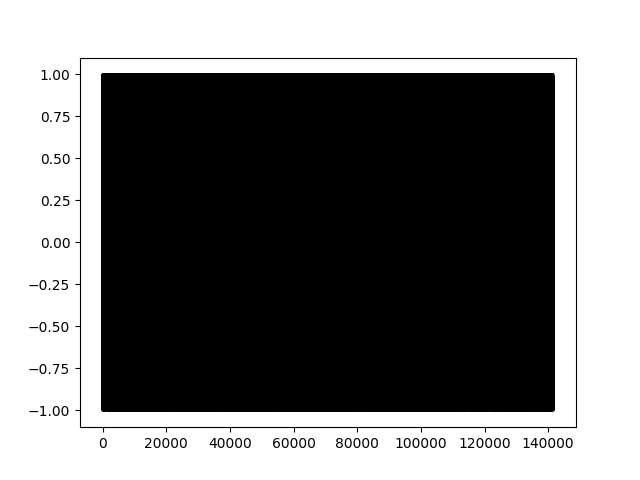

In [8]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(limbfoot_phase, c='black')

In [9]:
X = uncut_kins[4,start:end].reshape(-1,1)
Y = limbfoot_phase

reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [10]:
predic_y=reg.predict(X)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
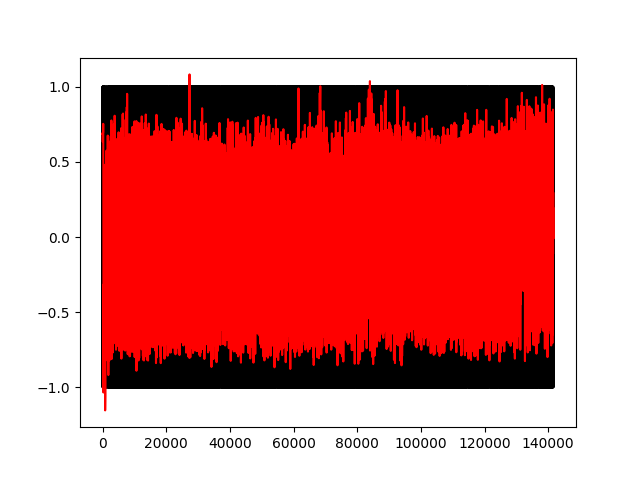

In [11]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.plot(limbfoot_phase, c='black')
ax0.plot(predic_y, c='red')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
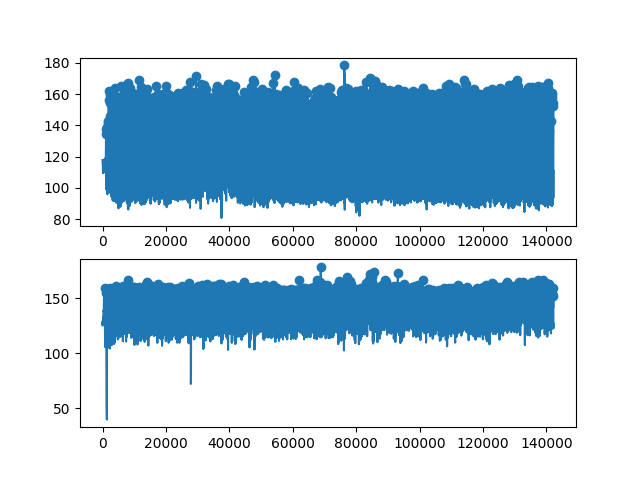

In [17]:
peaks, peak_heights = find_peaks(forelimb_angle, prominence = 10)
l_peaks, nada = find_peaks(limbfoot_angle, prominence=10)

fig2 = plt.figure()
ax2 = fig2.add_subplot(211)
ax2.plot(limbfoot_angle)
ax2.scatter(l_peaks, limbfoot_angle[l_peaks])
ax22 = fig2.add_subplot(212, sharex=ax2)
ax22.plot(forelimb_angle)
ax22.scatter(peaks, forelimb_angle[peaks])

In [ ]:
limbfoot_angle.shape

In [8]:
forelimb_angle = uncut_kins[6,:]
limbfoot_angle = uncut_kins[3,:]

In [9]:
h = train_wiener_filter(forelimb_angle, limbfoot_angle)
predic_limbfoot = test_wiener_filter(forelimb_angle, h)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
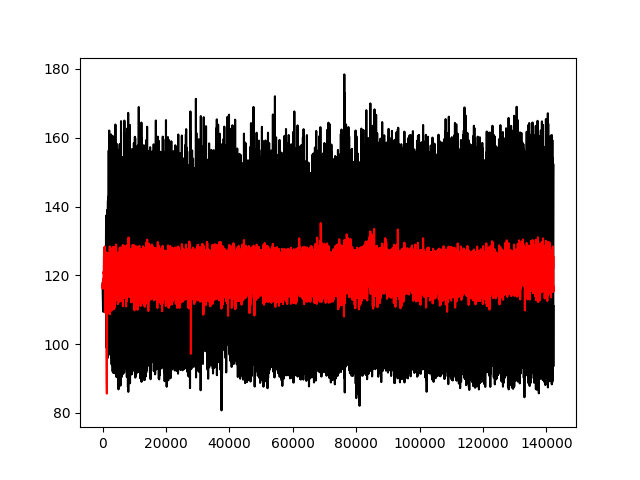

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(limbfoot_angle, c='black')
ax1.plot(predic_limbfoot, c='red')

In [ ]:
rates_f, angles_f=format_data(rates.T, angles.T, 10)

In [ ]:
rates_f_test, angles_f_test=format_data(rates_test.T, angles_test.T, 10)

In [16]:
h = train_wiener_filter(rates_f, angles_f)

In [34]:
predic_angles = test_wiener_filter(rates_f_test, h)

In [35]:
predic_angles.shape

(51, 4)

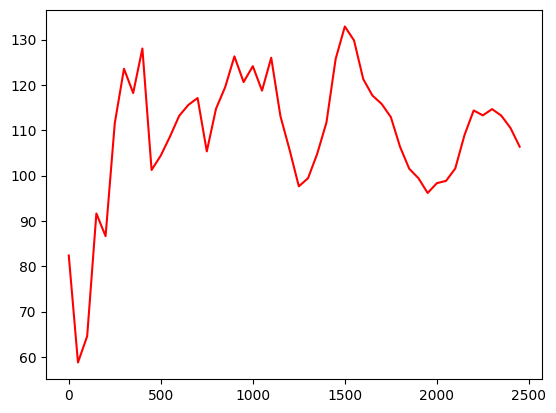

In [36]:
fig0=plt.figure()
ax0=fig0.add_subplot(111)
ts = np.arange(0,50*50,50)
ax0.plot(ts,predic_angles[:50,3], c='red')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
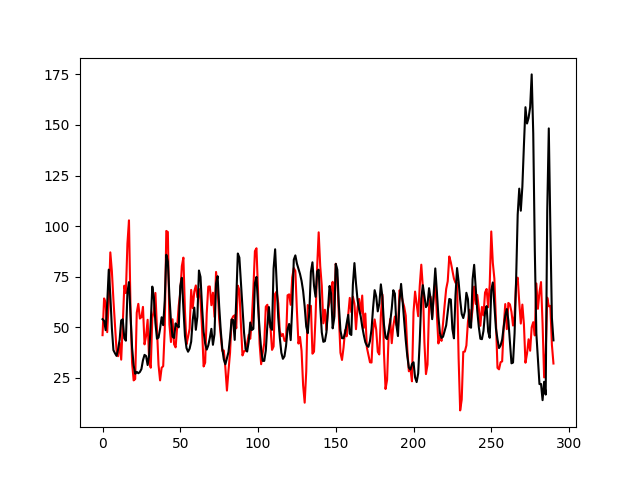

In [266]:
fig0=plt.figure()
ax0=fig0.add_subplot(111)
ax0.plot(predic_angles[:,0], c='red')
ax0.plot(angles_f_test[:,0], c='black')

In [268]:
vaf(angles_f_test[:,3], predic_angles[:,3])

0.17059527305779898

In [ ]:
ax0 = plt.figure()


In [ ]:
plt.

In [140]:
rates.shape

(32, 1501)

In [102]:
peaks, nada = find_peaks(angles[0,:], height=70)

In [105]:
peaks

array([   7,   16,   27,   38,   49,   61,   73,   83,   94,  108,  120,
        130,  142,  154,  166,  176,  187,  197,  209,  219,  229,  242,
        251,  262,  274,  286,  297,  308,  319,  333,  342,  351,  363,
        375,  386,  401,  410,  420,  432,  443,  452,  462,  473,  483,
        506,  517,  528,  540,  551,  561,  574,  584,  596,  608,  617,
        631,  642,  653,  663,  673,  686,  696,  707,  718,  734,  755,
        770,  780,  791,  802,  817,  829,  881,  901,  925,  934,  946,
        957,  970,  984,  994, 1004, 1014, 1033, 1047, 1072, 1082, 1097,
       1108, 1117, 1129, 1143, 1152, 1162, 1176, 1188, 1201, 1214, 1226,
       1242, 1251, 1260, 1272, 1283, 1297, 1308, 1320, 1333, 1344, 1348,
       1356, 1360, 1371, 1401, 1415, 1423, 1437, 1448, 1460, 1477, 1481,
       1485, 1496])

In [29]:
cap = cv2.VideoCapture('/home/diya/Documents/rat-fes/data/rat-q/q-diya-2022-02-14/videos/cam1_q0-021122-2_2022-02-11_200f-11e100g1DLC_resnet50_qFeb14shuffle1_180000_labeled.mp4')

In [30]:
frame_list = []
for numbah in times:
    frame = ((numbah * 50) / 5) + (40*200)
    cap.set(1, frame)
    ret, frame = cap.read()
    frame_list.append(frame)

In [60]:
len(frame_list)

9

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
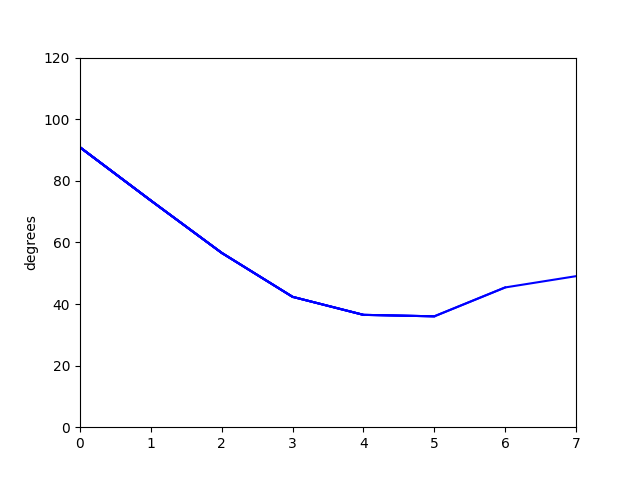

In [69]:
angle_list=[]
fig0=plt.figure()
ax0 = fig0.add_subplot(111)
ax0.set_xlim(0,7)
ax0.set_ylim(0,120)
start=times[0]
for i in range(times.shape[0]):
    y=angles[0,start:start+i]
    ax0.plot(y, c='blue')
    ax0.set_ylabel('degrees')
    plt.savefig('frame{0}'.format(i))
    
    

In [5]:
img_list=[]
for i in range(9):
    frame = cv2.imread('fr{}.png'.format(i))
    img_list.append(frame)
height = frame.shape[0]
width = frame.shape[1]
out = cv2.VideoWriter('kin.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

for img in img_list:
    out.write(np.array(img))
    
out.release()



In [33]:
height = np.array(frame_list[0]).shape[0]
width = np.array(frame_list[0]).shape[1]

out = cv2.VideoWriter('live_video.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

for frame in frame_list:
    out.write(np.array(frame))

out.release()

In [149]:
times

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15])

In [142]:
peaks

array([   7,   16,   27,   38,   49,   61,   73,   83,   94,  108,  120,
        130,  142,  154,  166,  176,  187,  197,  209,  219,  229,  242,
        251,  262,  274,  286,  297,  308,  319,  333,  342,  351,  363,
        375,  386,  401,  410,  420,  432,  443,  452,  462,  473,  483,
        506,  517,  528,  540,  551,  561,  574,  584,  596,  608,  617,
        631,  642,  653,  663,  673,  686,  696,  707,  718,  734,  755,
        770,  780,  791,  802,  817,  829,  881,  901,  925,  934,  946,
        957,  970,  984,  994, 1004, 1014, 1033, 1047, 1072, 1082, 1097,
       1108, 1117, 1129, 1143, 1152, 1162, 1176, 1188, 1201, 1214, 1226,
       1242, 1251, 1260, 1272, 1283, 1297, 1308, 1320, 1333, 1344, 1348,
       1356, 1360, 1371, 1401, 1415, 1423, 1437, 1448, 1460, 1477, 1481,
       1485, 1496])

In [145]:
(8*50) /5

80.0

In [91]:
average_rates = rates[4,:]

In [92]:
gait_neural_list = []
for i in range(np.size(peaks)-1):
    first = peaks[i]
    last = peaks[i+1]
    signal = average_rates[first:last]
    signal_resample = resample(signal, 12)
    gait_neural_list.append(signal_resample)

In [93]:
gait_array = np.array(gait_neural_list)

In [94]:
avg_ = np.average(gait_array,0)

In [95]:
avg_

array([19.39686141, 18.10791964, 17.20259472, 19.19650262, 17.98403708,
       16.8015828 , 16.33267552, 16.6199556 , 11.36578505, 12.86055416,
       15.58269826, 14.55901845])

In [96]:
tss = np.arange(0,12)

In [97]:
std = np.std(gait_array,0)

<ErrorbarContainer object of 3 artists>

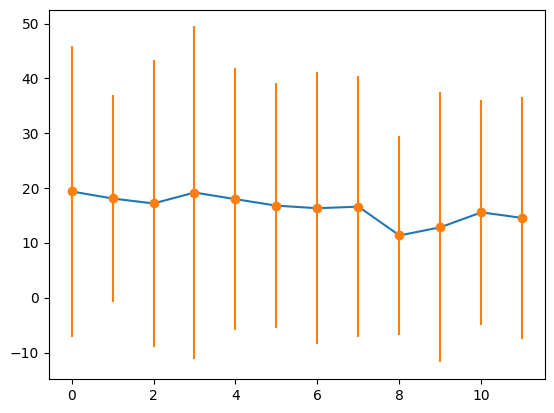

In [98]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(tss,avg_)
ax2.errorbar(tss,avg_,yerr=std, fmt="o")

In [69]:
std = np.std(gait_array,0)

In [47]:
std

array([18.54136468, 15.43432685, 18.49913571, 16.75408585, 17.95676012,
       15.33323029, 16.1852493 , 17.27040738, 14.76108231, 17.03417494,
       15.63608725, 16.71215573])

In [48]:
avg_

array([22.95391996, 19.3749009 , 18.18156461, 19.05825268, 18.53543933,
       16.70265311, 16.85946695, 17.97463482, 16.30300117, 14.85549385,
       15.18007644, 19.20644229])

In [36]:
peaks, nada = find_peaks(angles[0,:], height=70)

In [48]:
np.size(peaks)

123

In [25]:
angles_trunc = angles[:,8000:23000]

In [105]:
rates.shape

(32, 1501)

In [106]:
1501*50

75050

In [83]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [120]:
normal_rates = NormalizeData(rates)
cmaps=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

In [86]:
times

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15])

In [87]:
np.full(0,13)

array([], dtype=int64)

In [90]:
np.arange(0,1)

array([0])

In [93]:
times[0]

7

In [100]:
times

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15])

In [103]:
test[times[0]:times[0]+3]

array([0.16666667, 0.25      , 0.08333333])

In [117]:
for idx, chan in enumerate(normal_rates):
    print(chan[3])

0.08333333333333333
0.16666666666666666
0.16666666666666666
0.08333333333333333
0.3333333333333333
0.16666666666666666
0.16666666666666666
0.0
0.25
0.16666666666666666
0.3333333333333333
0.4166666666666667
0.16666666666666666
0.25
0.3333333333333333
0.25
0.08333333333333333
0.25
0.16666666666666666
0.3333333333333333
0.25
0.4166666666666667
0.25
0.25
0.3333333333333333
0.16666666666666666
0.3333333333333333
0.08333333333333333
0.3333333333333333
0.3333333333333333
0.25
0.16666666666666666


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
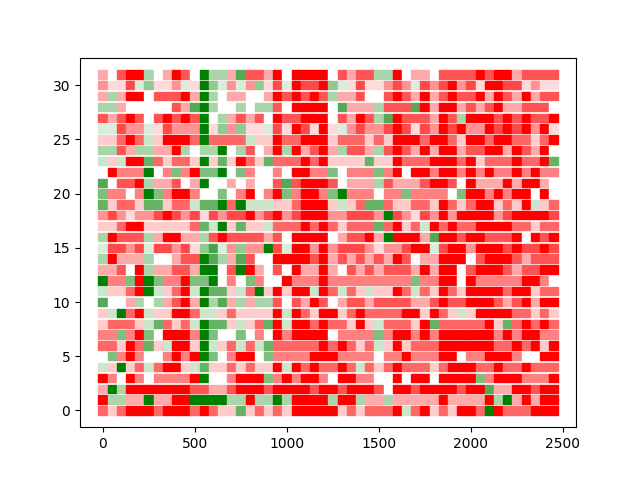

In [278]:
fig0=plt.figure()
ax0 = fig0.add_subplot(111)

start=times[0]
for idx, chan in enumerate(normal_rates):
    x_axis = np.arange(0, 50*50, 50)
    y_axis = np.full(50, idx)
    color = chan[times[0]:times[0]+50]
    ax0.scatter(x_axis,y_axis, c=color,cmap=cmaps, marker='s')

plt.savefig('testy{0}'.format(i))


    

In [115]:
y_axis = np.ones(rates.shape[1])
x_axis = np.arange(0,rates.shape[1]*50, 50)
t = np.arange(rates.shape[1])

In [123]:
rates

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [40.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [40., 60., 40., ...,  0.,  0.,  0.],
       [60., 60., 40., ...,  0.,  0.,  0.],
       [40., 60.,  0., ...,  0.,  0.,  0.]])

In [119]:
rates[0].shape

(1501,)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
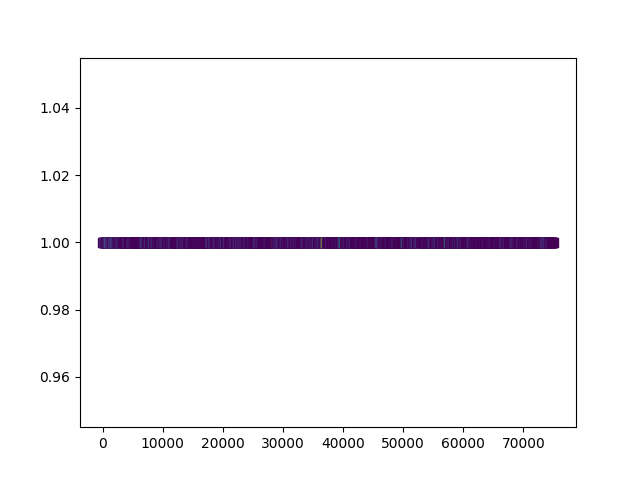

In [122]:
fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.scatter(x_axis,y_axis, c=rates[0], marker='s')

In [29]:
find_peaks(angles_trunc[0,:], height=70)

(array([   67,   165,   273,   375,   492,   609,   733,   829,   935,
         1079,  1195,  1301,  1415,  1542,  1656,  1763,  1864,  1968,
         2090,  2184,  2285,  2414,  2506,  2619,  2743,  2855,  2966,
         3078,  3186,  3332,  3414,  3511,  3630,  3744,  3862,  4004,
         4094,  4197,  4319,  4423,  4519,  4618,  4729,  4826,  5057,
         5162,  5275,  5395,  5509,  5609,  5740,  5840,  5960,  6080,
         6168,  6304,  6417,  6525,  6627,  6721,  6854,  6955,  7061,
         7176,  7339,  7544,  7696,  7792,  7906,  8014,  8168,  8283,
         8638,  8807,  8902,  9003,  9153,  9247,  9336,  9452,  9560,
         9691,  9832,  9935, 10030, 10131, 10328, 10466, 10715, 10817,
        10967, 11069, 11167, 11286, 11423, 11510, 11609, 11748, 11875,
        12007, 12130, 12256, 12411, 12502, 12595, 12712, 12823, 12961,
        13072, 13194, 13321, 13432, 13470, 13547, 13589, 13703, 13875,
        14002, 14141, 14222, 14363, 14469, 14588, 14758, 14801, 14842,
      

(array([132, 214, 311, 430, 544]),
 {'peak_heights': array([88.77854358, 80.79748519, 85.77519009, 87.25017393, 86.69914909])})

In [62]:
h = linear_decoder(rates, angles)

In [43]:
test_rates, test_angles = process_neural_kinangles(tdt, kin, np_ts, 3.5, crop)
test_rates = test_rates.T
test_angles = test_angles.T
test_rates_format, test_angles_format = format_data(test_rates, test_angles, 10)
test_h = train_wiener_filter(test_rates_format, test_angles_format)
test_predic_angles = test_wiener_filter(test_rates_format, h)

read from t=0s to t=140.63s


In [29]:
tdt_data = extract_tdt('/home/diya/Documents/rat-fes/data/rat-q/2-11-22/TDT/q0-021122-2-220211-160509')

read from t=0s to t=140.63s


In [8]:
tdt_data['neural'].shape

(32, 3430400)

In [9]:
tdt_data['pulse_time']

3.84196608

In [11]:
1192382 + (10*(tdt_data['fs']))

1436522.625

In [30]:
tdt_data['neural'] = tdt_data['neural'][:, 1192382:1436530]

In [24]:
1436530 - 1192382

244148

In [17]:
neural = tdt_data['neural']

In [31]:
tdt_data['ts'] = np.arange(0,244148 / tdt_data['fs'], 1/tdt_data['fs'])

In [35]:
tdt_data['ts'].shape

(244148,)

In [33]:
neural.shape

(32, 244148)

In [38]:
neural = filter_neural(neural, tdt_data['fs'])

In [39]:
neural = remove_artifacts(neural, tdt_data['fs'])

In [46]:
spikes = autothreshold_crossings(neural, 3.5)

In [48]:
binned = spike_binner(spikes, tdt_data['fs'])

In [51]:
binned.shape

(32, 201)

In [52]:
binned_ts = np.arange(0,201*50,50)

<BarContainer object of 201 artists>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
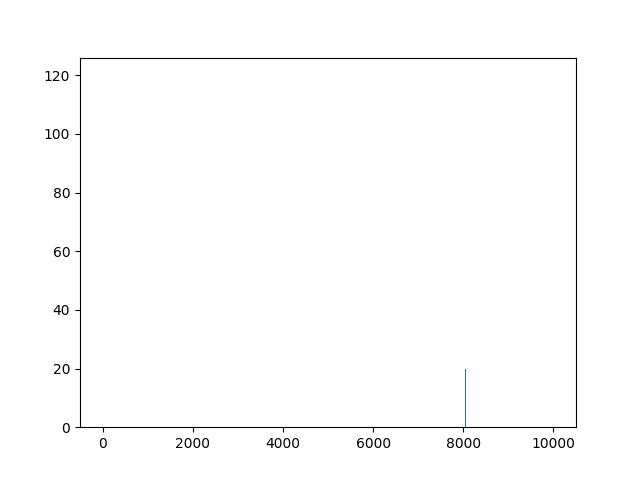

In [54]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.bar(binned_ts, binned[0,:])